# Hi I am Akshay Kumar!

**LIBRARIES USED**
- Pandas, numpy, matplotlib, sklearn are used in this project.
- Decision tree is used to fit the model.
- Visualized the decision tree model with sklearn - export_graphviz.


IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris    ------ we can also load data with this..

READING DATASET AND EXPLORATORY DATA ANALYSIS

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
features = pd.DataFrame(data, columns = ['Id',	'SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm'])
features

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
target = pd.DataFrame(data.Species) 
target

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
target.value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
target = pd.get_dummies(target)
target

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


MODEL BUILDING AND DECISION TREE VISUALIZATION

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

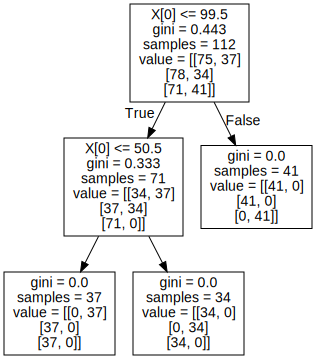

In [ ]:
import graphviz
from sklearn.tree import  export_graphviz
from IPython.display import display
display(graphviz.Source(export_graphviz(model)))

In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
species = np.array(y_test).argmax(axis = 1)
pred = np.array(predictions).argmax(axis = 1)
confusion_matrix(species, pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
# Species_Iris-setosa	
# Species_Iris-versicolor
# Species_Iris-virginica

OTHER DETAILED VISUALIZATION OF DATASET

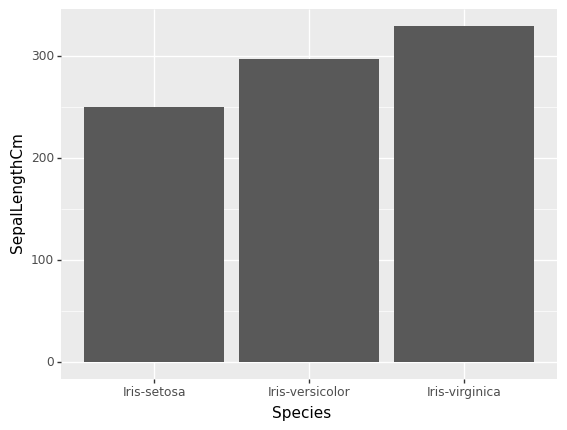

<ggplot: (8758777909664)>

In [ ]:
from plotnine import ggplot, aes, geom_col
ggplot(data) + aes(x = 'Species', y = 'SepalLengthCm') + geom_col()

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.


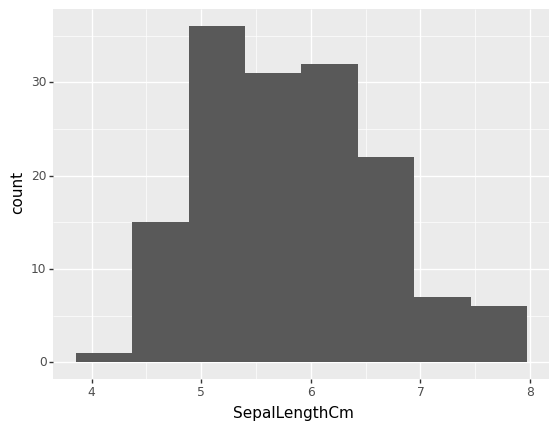

<ggplot: (8758777943504)>

In [ ]:
from plotnine import ggplot, aes, geom_histogram
ggplot(data) + aes(x = 'SepalLengthCm') + geom_histogram()

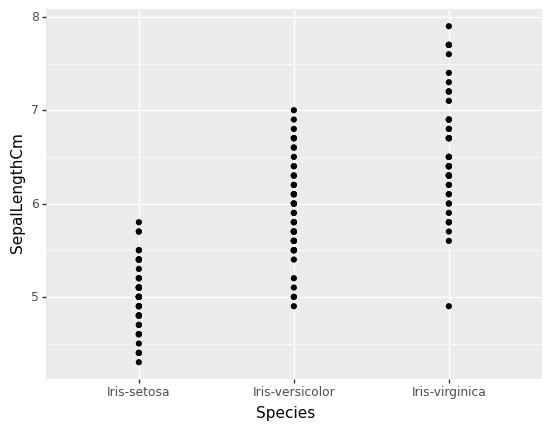

<ggplot: (8758777849847)>

In [ ]:
from plotnine import ggplot, aes, geom_point
ggplot(data) + aes(x = 'Species', y = 'SepalLengthCm') + geom_point()

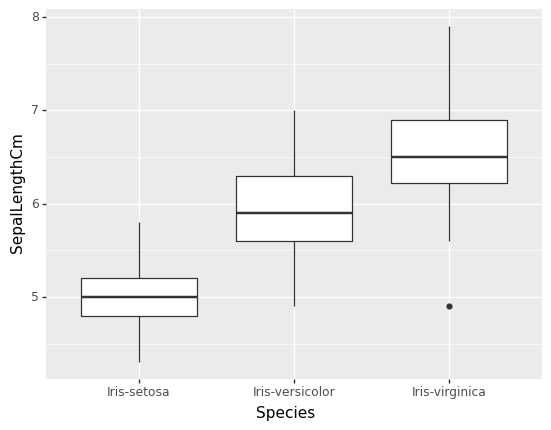

<ggplot: (8758780735245)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot
ggplot(data) + aes(x = 'Species', y = 'SepalLengthCm') + geom_boxplot()

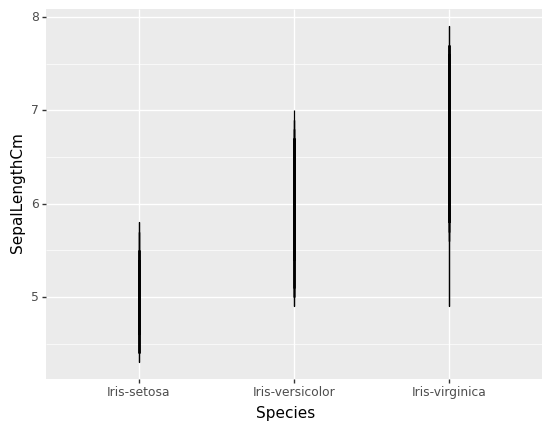

<ggplot: (8758777923232)>

In [ ]:
from plotnine import ggplot, aes, geom_line
ggplot(data) + aes(x = 'Species', y = 'SepalLengthCm') + geom_line()

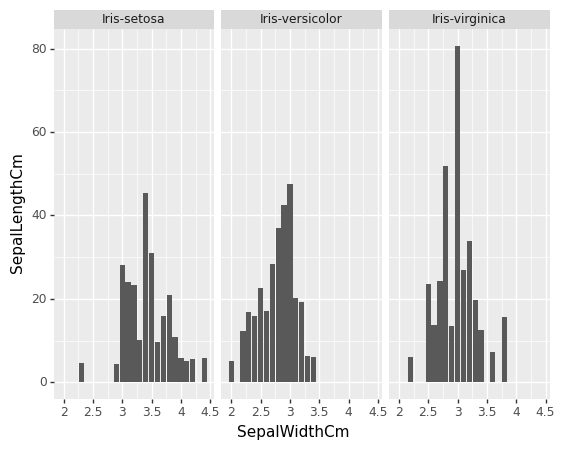

<ggplot: (8758777626031)>

In [ ]:
from plotnine import ggplot, aes, geom_col, facet_grid, labs
(ggplot(data) + facet_grid(facets = '~Species') + aes(x = 'SepalWidthCm', y = 'SepalLengthCm') + 
labs(x = 'SepalWidthCm', y = 'SepalLengthCm') + geom_col())

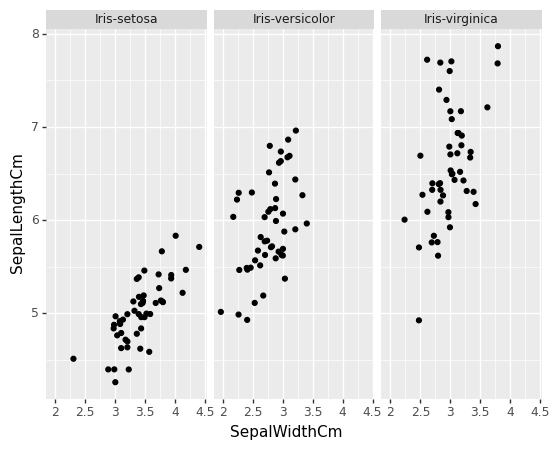

<ggplot: (8758777519845)>

In [ ]:
from plotnine import ggplot, aes, geom_jitter, facet_grid, labs
(ggplot(data) + facet_grid(facets = '~Species') + aes(x = 'SepalWidthCm', y = 'SepalLengthCm') + 
labs(x = 'SepalWidthCm', y = 'SepalLengthCm') + geom_jitter())